In [23]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [45]:
X,Y=make_circles(n_samples=500,noise=0.02)

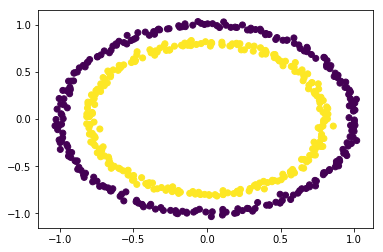

In [46]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [47]:
def phi(X):
    '''
    Function to increase the dimentionality of a data X
    '''
    
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_=np.zeros((X.shape[0],3))
    X_[:,:-1]=X
    X_[:,-1]=X3
    
    return X_

In [48]:
X_=phi(X)

In [49]:
## Visualizing the new higher dimentional data
def plot3D(X):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    
    ax.scatter(X[:,0],X[:,1],X[:,2],zdir='z',s=20,c=Y,depthshade=True)
    return ax

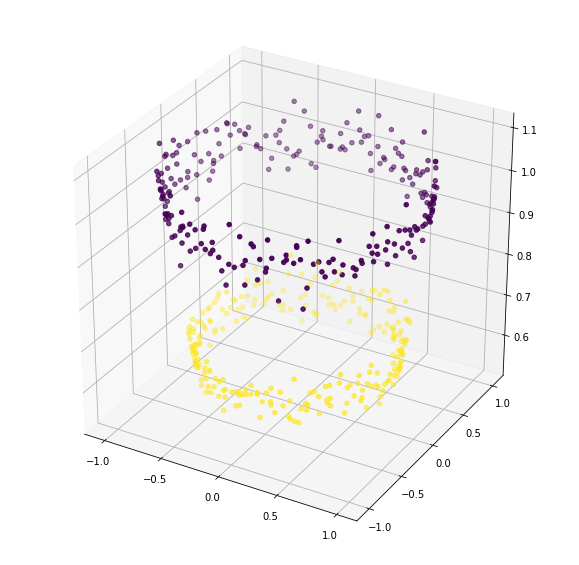

In [50]:
ax=plot3D(X_)
plt.show()

## Now it is easier to separate the classes using a linear classifier

In [51]:
## Using Logistic Regression to train the new data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [58]:
lr=LogisticRegression(solver='lbfgs')
acc=cross_val_score(lr,X,Y,cv=5,scoring='accuracy').mean()
print('Accuracy for 2D data: {:.2f}%'.format(acc*100))

Accuracy for 2D data: 45.80%


In [59]:
lr=LogisticRegression(solver='lbfgs')
acc=cross_val_score(lr,X_,Y,cv=5,scoring='accuracy').mean()
print('Accuracy for 3D data: {:.2f} %'.format(acc*100))

Accuracy for 3D data: 100.00 %


## Representing Hyperplane separating the classes

In [70]:
lr.fit(X_,Y)
wts=lr.coef_
bias=lr.intercept_

In [71]:
w1=wts[0,0]
w2=wts[0,1]
w3=wts[0,2]
b=bias

In [68]:
x,y=np.meshgrid(range(-2,2),range(-2,2))
print(x)
print(y)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [72]:
z=-(x*w1+y*w2+b)/w3

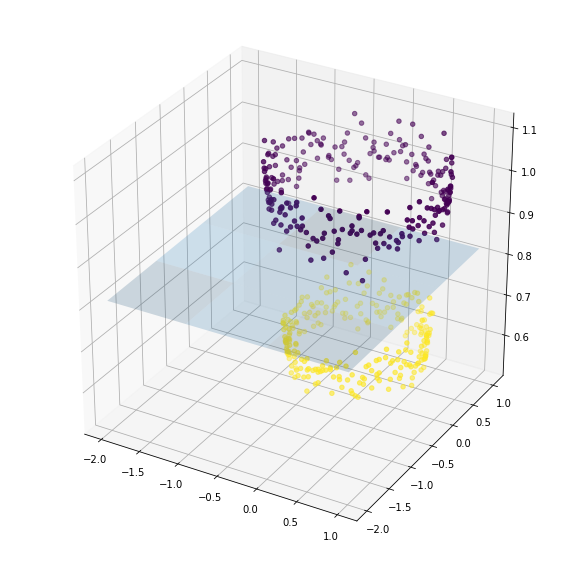

In [76]:
ax=plot3D(X_)
ax.plot_surface(x,y,z,alpha=0.2)
plt.show()

## Kernel Based Classifcation in SVM's
Sklearn supports the following types of Kernels, which can be used in many-real life problems.

- Linear Kernel
- RBF Kernel
- Polynomial Kernel
- Sigmoid Kernel

**Kernel trick** is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

In [77]:
from sklearn import svm

### Linear Kernel :  Used for classification on linearly separable data

In [79]:
svc=svm.SVC(kernel='linear')
svc.fit(X,Y)
svc.score(X,Y)

0.5

### RBF kernel : Non-linear Classification

In [82]:
svc=svm.SVC(kernel='rbf',gamma='auto')
svc.fit(X,Y)
svc.score(X,Y)

1.0

### Polynomial Kernel

In [84]:
svc=svm.SVC(kernel='poly',gamma='auto')
svc.fit(X,Y)
svc.score(X,Y)

0.594

### Sigmoid Kernel

In [86]:
svc=svm.SVC(kernel='sigmoid',gamma='auto')
svc.fit(X,Y)
svc.score(X,Y)

0.498

## Custom Kernel

In [87]:
def custom_kernel(x1,x2):
    return np.dot(x1,x2.T)**2

svc=svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0